In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd
import numpy as np

In [89]:
df = pd.read_csv('life_all.csv')
df = df.set_index('구분1')
df.head()

,1996 년,1997 년,1998 년,1999 년,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,...,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020년,2021년
구분1,,,,,,,,,,,,,,,,,,,,,
강원,59.0,37.9,40.9,63.0,66.0,91.5,122.1,102.0,123.1,126.0,...,169.7,153.5,204.1,161.7,137.3,162.7,196.3,264.7,104507.8,114571.8
경기,579.0,638.3,636.8,594.0,565.6,573.9,710.3,757.8,745.7,736.7,...,816.8,803.8,842.9,847.3,1017.4,1129.9,1301.5,1572.0,674379.0,789086.5
경남,173.0,116.5,154.1,168.7,179.1,229.7,261.2,263.0,279.5,301.8,...,374.4,310.2,360.9,307.6,336.4,331.2,335.0,409.1,160810.0,181060.0
경북,59.0,72.7,84.4,112.5,114.3,103.9,111.9,149.8,194.6,208.7,...,181.1,206.9,185.6,216.1,280.5,271.0,318.6,320.6,146123.6,147046.8
광주,42.0,49.5,52.4,58.2,63.6,52.4,129.8,115.8,134.3,134.0,...,124.1,133.4,128.9,141.6,138.5,119.8,135.3,129.6,51582.7,73882.0


# 1. 전처리

In [90]:
df['2020 년'] = df['2020년'].apply(lambda x: x / 365)
df['2021 년'] = df['2021년'].apply(lambda x: x / 365)

In [106]:
df.index.name = '지역'
df.drop(['2020년','2021년'], axis = 1, inplace = True)

#### Transpose 및 to_datetime

In [119]:
df_t = df.transpose()
df_t.index.name = '년도'

df_t.drop(['세종'], axis = 1, inplace = True ) #데이터 부족 
df_t['울산'] = df_t['울산'].replace(0, np.nan) #측정되지 않는 값

In [120]:
df_t.index = pd.to_datetime(df_t.index, format='%Y 년')
df_t.index = df_t.index.strftime('%Y년')

In [121]:
df_t.head()

지역,강원,경기,경남,경북,광주,대구,대전,부산,서울,울산,인천,전남,전북,제주,충남,충북
년도,,,,,,,,,,,,,,,,
1996년,59.0,579.0,173.0,59.0,42.0,126.0,152.4,260.0,618.0,NaN,100.0,79.0,63.0,19.9,64.0,48.9
1997년,37.9,638.3,116.5,72.7,49.5,131.3,156.5,249.0,599.4,61.8,100.7,76.4,64.7,29.7,79.7,53.8
1998년,40.9,636.8,154.1,84.4,52.4,197.3,126.7,242.5,506.6,52.2,152.9,85.8,64.5,14.9,77.0,73.0
1999년,63.0,594.0,168.7,112.5,58.2,244.5,136.3,290.3,589.2,66.9,145.3,75.0,96.1,22.0,70.9,53.8
2000년,66.0,565.6,179.1,114.3,63.6,261.4,114.9,260.9,652.2,74.3,201.9,73.3,92.5,16.2,77.7,55.1


# 2. 시각화

In [144]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 한글 깨짐 문제 해결 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  


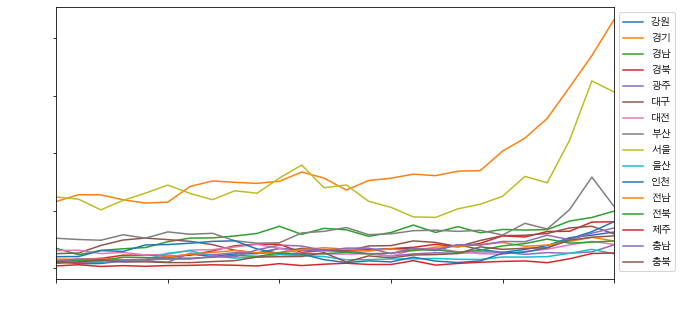

In [153]:

df_t.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')



plt.xticks(rotation=0) #레이블 각도
plt.legend(bbox_to_anchor=(1,1)) #라벨 위치 변경 
 
plt.show()

서울 및 경기의 인구 수 상승으로 인하여 현대로 갈수록 급상승하는 추세를 보임. 비정상 시계열 차트임을 확인 할 수 있음.

#### 서울 및 경기

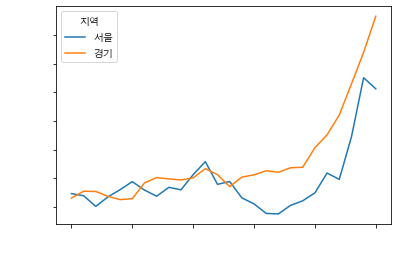

In [160]:
df_t[['서울','경기']].plot() #nouvelle trame de données
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')

plt.show()


경기의 경우 현대로 갈수록 강하게 증가하는 추세를 보이며 서울 또한 마찬가지이다. 데이터의 안정화가 필요함을 확인할 수 있다. 

#### 그 외

서울 및 경기 제외한 시각화 

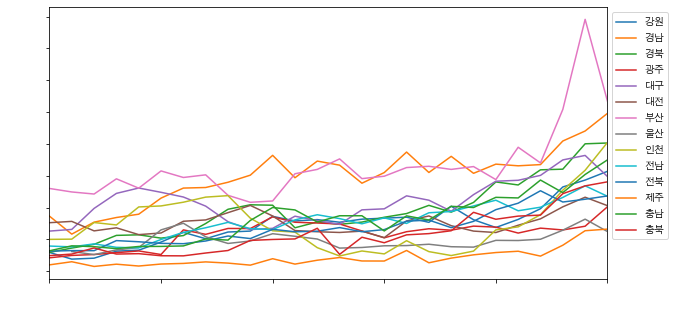

In [172]:
# 제외할 컬럼들
excluded_columns = ['서울', '경기']
# 추출할 컬럼들
selected_columns = [col for col in df_t.columns 
                    if col not in excluded_columns]

# 선택한 컬럼들로 데이터 프레임 생성
selected_df = df_t[selected_columns]

# 선택한 컬럼들 시각화
selected_df.plot(figsize=(10,5)).autoscale(axis='x',tight=True);

# 그래프 출력
plt.xlabel('연도', color='white')
plt.xticks(color='white')
plt.ylabel('배출량', color='white')
plt.yticks(color='white')
plt.legend(bbox_to_anchor=(1,1)) 


plt.show()


서울 및 경기를 제외한 도시들의 경우, 점진적으로 증가하는 추세를 보였고, 부산에서 일시적인 이상치를 발견하였다.  